# Demonstrate different plot options for different variables

In [6]:
library(RforHDSdata) 
library(patchwork)


suppressPackageStartupMessages(library(GGally)) 
suppressPackageStartupMessages(library(gt))
suppressPackageStartupMessages(library(gtsummary))
suppressPackageStartupMessages(library(tidyverse))

data(NHANESsample)
data(pain)

## Univariate Distributions

In this chapter, we will use a sample of the National Health and Nutrition Examination Survey ([NHANES](https://www.cdc.gov/nchs/nhanes/index.htm)) containing lead, blood pressure, BMI, smoking status, alcohol use, and demographic variables from NHANES 1999-2018. There are 31,625 observations in this sample. Use the help operator `?NHANESsample` to read the variable descriptions.

In [7]:
data(NHANESsample)
dim(NHANESsample)
names(NHANESsample)

[1] 31265    21

[1] "ID"            "AGE"           "SEX"           "RACE"         
 [5] "EDUCATION"     "INCOME"        "SMOKE"         "YEAR"         
 [9] "LEAD"          "BMI_CAT"       "LEAD_QUANTILE" "HYP"          
[13] "ALC"           "DBP1"          "DBP2"          "DBP3"         
[17] "DBP4"          "SBP1"          "SBP2"          "SBP3"         
[21] "SBP4"

To start our exploration, we will look at whether there are any missing values. We use the `complete.cases()` function to observe that there are no complete cases. We also see that the subsequent blood pressure measurements and alcohol use have the highest percentage of missing values. For demonstration, we choose to only keep the first systolic an diastolic blood pressure measurements and do a complete case analysis using the `na.omit()` function to define our complete data frame `nhanes_df`. 

In [8]:
sum(complete.cases(NHANESsample))
apply(NHANESsample, 2, function(x) sum(is.na(x)))/nrow(NHANESsample)

[1] 0

ID           AGE           SEX          RACE     EDUCATION 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0006716776 
       INCOME         SMOKE          YEAR          LEAD       BMI_CAT 
 0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000 
LEAD_QUANTILE           HYP           ALC          DBP1          DBP2 
 0.0000000000  0.0000000000  0.0268671038  0.0600351831  0.0639053254 
         DBP3          DBP4          SBP1          SBP2          SBP3 
 0.0709739325  0.8911242604  0.0600351831  0.0639053254  0.0709419479 
         SBP4 
 0.8911242604

In [9]:
nhanes_df <- na.omit(subset(NHANESsample, select= -c(SBP2, SBP3, SBP4, DBP2, DBP3, DBP4)))

In the last chapter, we introduced the `table()` and `summary()` functions to quickly summarize categorical and quantitative vectors. 

In [10]:
table(nhanes_df$SMOKE)
summary(nhanes_df$YEAR)


NeverSmoke  QuitSmoke StillSmoke 
     13774       8019       6799 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1999    2003    2007    2008    2011    2017 

We decide to select the most recent observations from NHANES 2017-2018 for our analysis in this chapter. We use the `subset()` function to select these rows. 

In [11]:
nhanes_df <- subset(nhanes_df, nhanes_df$YEAR==2017)

As shown above, smoking status has been coded into three categories: "NeverSmoke", "QuitSmoke", and "StillSmoke". We want to create a new variable to represent whether someone has ever smoked. To do so, we use the `ifelse()` function, which allows us to create a new vector using logic. The logic captured by this function is that we will take one value if we meet some condition(s) and we will take a second value otherwise. The first argument is a vector of TRUE/FALSE values representing the conditions, the next argument is the value to use if we meet the condition(s), and the last argument is the value to use otherwise. We use this function to create a new vector `EVER_SMOKE` that is equal to "Yes" for those who are either still smoking or quit smoking and equal to "No" otherwise. 

In [12]:
nhanes_df$EVER_SMOKE <- ifelse(nhanes_df$SMOKE %in% c("QuitSmoke", "StillSmoke"), "Yes", "No")
table(nhanes_df$EVER_SMOKE)


  No  Yes 
1411 1173 

The `summary()` and `table()` functions allow us to summarize the univariate sample distributions of columns. We may also want to plot these distributions. We saw in the [last chapter](https://alicepaul.github.io/r-for-health-data-science/book/3_data_files.html) that the `hist()` function creates a histogram plot. Below we use this function to plot a histogram of the log transformation of the lead column.

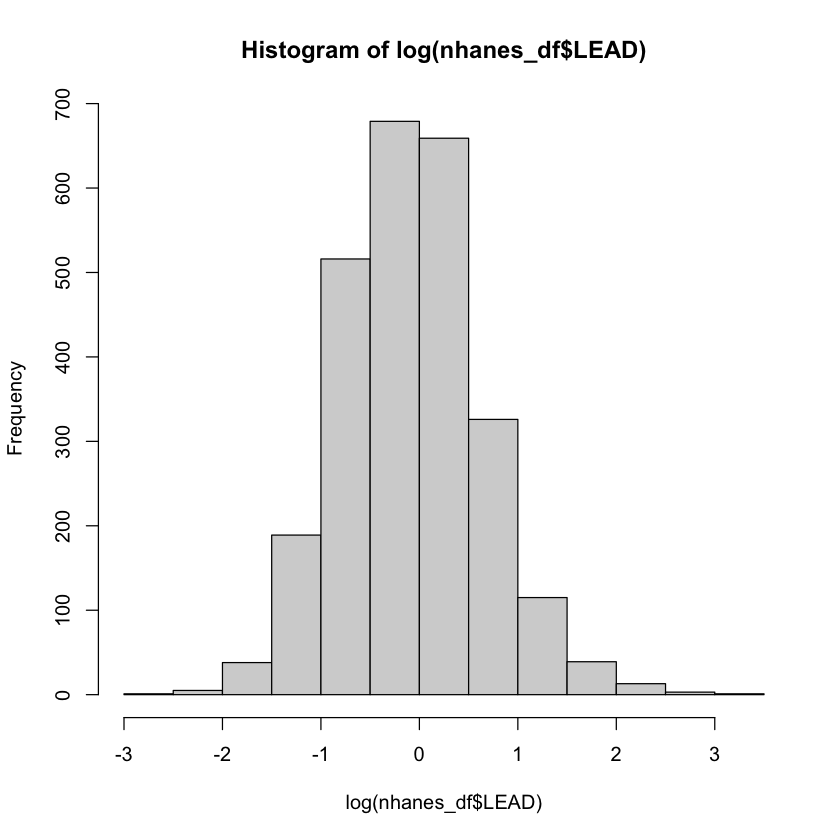

In [13]:
hist(log(nhanes_df$LEAD))

If we want to polish this figure, we can use some of the other optional arguments to the `hist()` function.  For example, we may want to update the text `log(nhanes_df$lead)` in the title and x-axis. Below, we update the [color](http://www.stat.columbia.edu/~tzheng/files/Rcolor.pdf), labels, and number of bins for the plot. The argument `breaks` specifies the number of bins to use to create the histogram, `col` specifies the color, `main` specifies the title of the plot, and `xlab` specifies the x-axis label (using `ylab` would specify the y-axis label). Read the documentation `?hist` for the full list of arguments available.

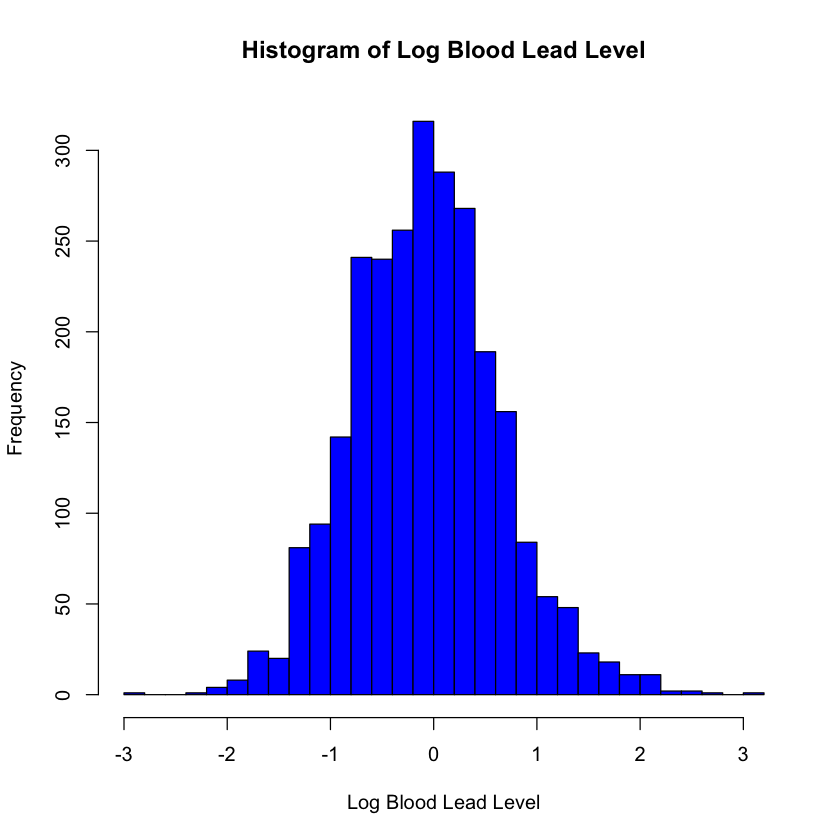

In [14]:
hist(log(nhanes_df$LEAD), breaks = 30, col="blue", main="Histogram of Log Blood Lead Level",
    xlab="Log Blood Lead Level")

For categorical variables, we may want to plot the counts in each category using a bar plot. The function `barplot()` asks us to specify the `names` and `heights` of the bars. To do so, we will need to store the counts for each category. Again, we update the color and labels.

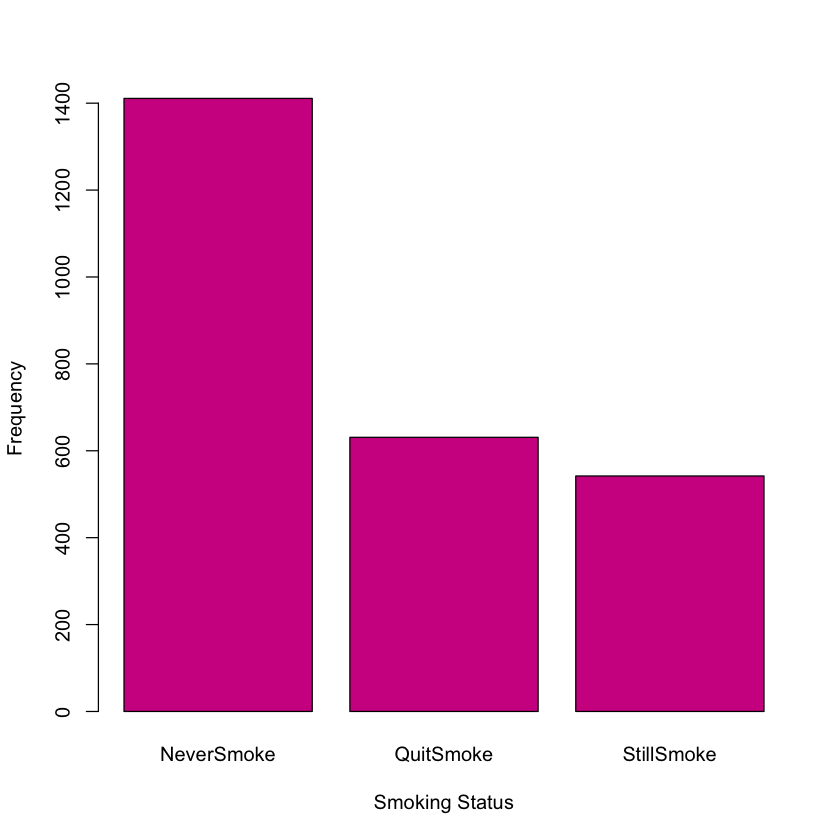

In [15]:
smoke_counts <- table(nhanes_df$SMOKE)
barplot(height=smoke_counts, names=names(smoke_counts), col="violetred",
       xlab="Smoking Status", ylab="Frequency")

With a bar plot, we can even specify a different color for each bar. To do so, `col` must be a vector of specified colors with the same length as the number of categories.

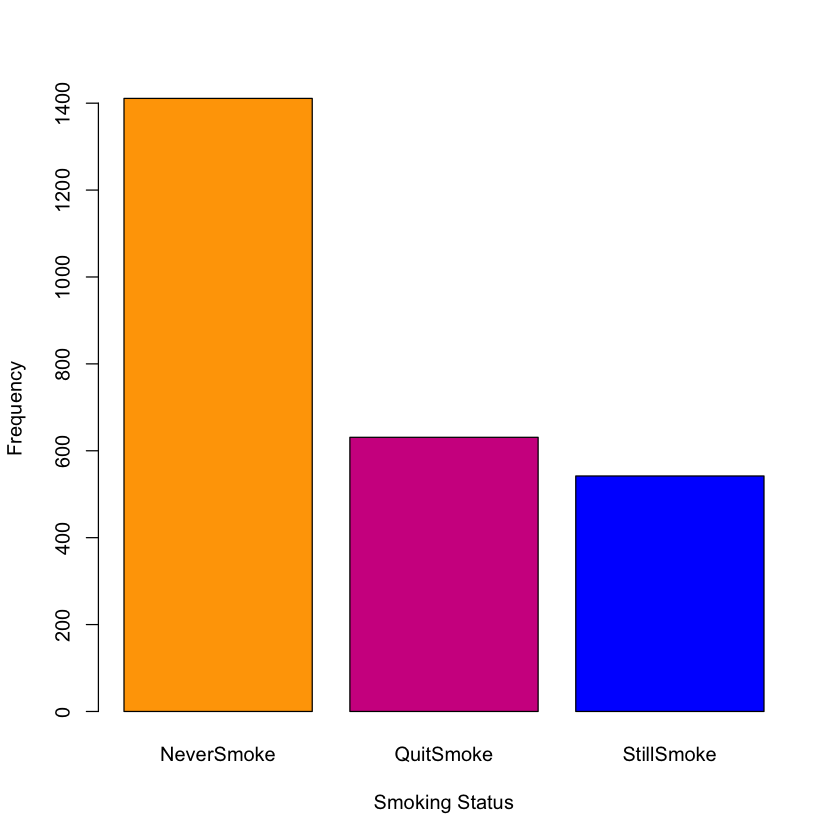

In [16]:
barplot(height=smoke_counts, names=names(smoke_counts), col=c("orange","violetred","blue"),
       xlab="Smoking Status", ylab="Frequency")

# Relationship between categorical columns and correlation between continuous variables and ask students to complete following practice question

## Bivariate Distributions

We now turn our attention to relationships among multiple columns. When we have two categorical variables, we can use the `table()` function to find the counts across all combinations. For example, below we look at the distribution of smoking status levels by sex. We observe that a higher percentage of female participants have never smoked.

In [17]:
table(nhanes_df$SMOKE, nhanes_df$SEX)

            
             Male Female
  NeverSmoke  596    815
  QuitSmoke   390    241
  StillSmoke  324    218

To look at the sample distribution of a continuous variable stratified by a cateogrical variable, we could call the `summary()` function for each subset of the data. Below we look at the distribution of blood lead level by sex. 

In [18]:
summary(nhanes_df$LEAD[nhanes_df$SEX=="Female"])
summary(nhanes_df$LEAD[nhanes_df$SEX=="Male"])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.100   0.470   0.770   0.977   1.208   8.670 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.050   0.700   1.090   1.461   1.660  22.010 

We could also observe this visually through a box plot. When given one categorical variable and one continuous variable, the `plot()` function creates a box plot. By default, the first argument is the x-axis variable and second argument is the y-axis variable. 

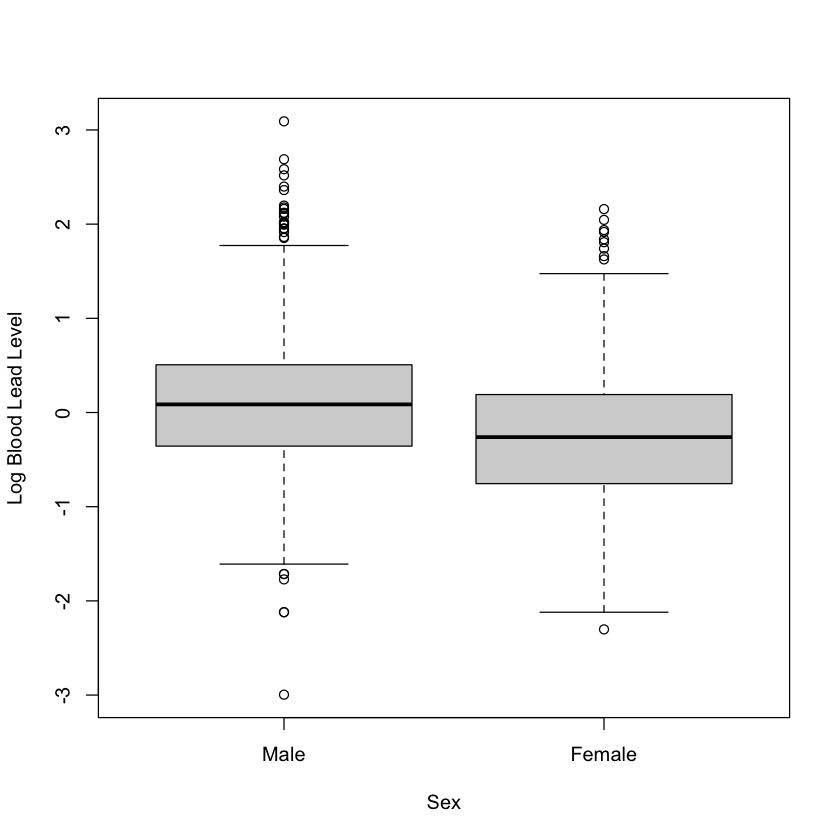

In [19]:
plot(nhanes_df$SEX, log(nhanes_df$LEAD), ylab="Log Blood Lead Level", xlab="Sex")

Alternatively, we could use the `boxplot()` function, which can be passed a formula. A formula is a string representation of how to group the data, where the left hand side is the continuous variable and the right hand side is one or more categorical variables to group by. In the case below, we group by multiple columns, `SEX` and `EVER_SMOKE`, so our formula is `log(LEAD)~SEX+EVER_SMOKE`. The second argument to the function specifies the data.  We specify the column colors to show the link between the box plots shown. 

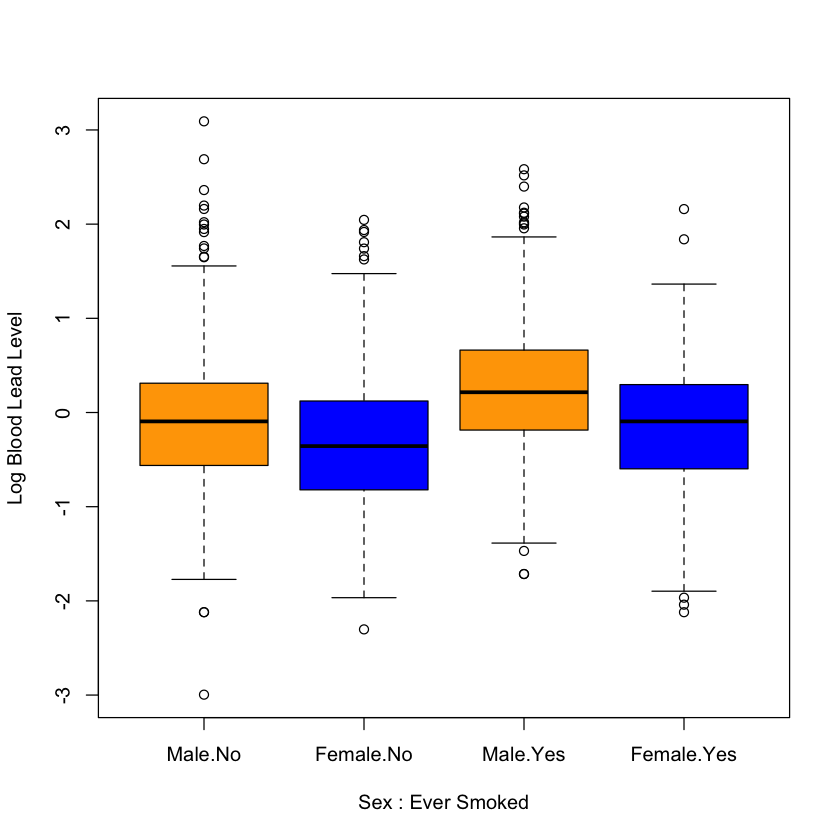

In [20]:
boxplot(log(LEAD)~SEX+EVER_SMOKE, data=nhanes_df, col=c("orange", "blue", "orange", "blue"),
       xlab="Sex : Ever Smoked", ylab = "Log Blood Lead Level")

To visualize the bivariate distributions between two continuous variables, we can use scatter plots. To create a scatter plot, we use the `plot()` function again. Below, we use this function to show the relationship between systolic and diastolic blood pressure. 

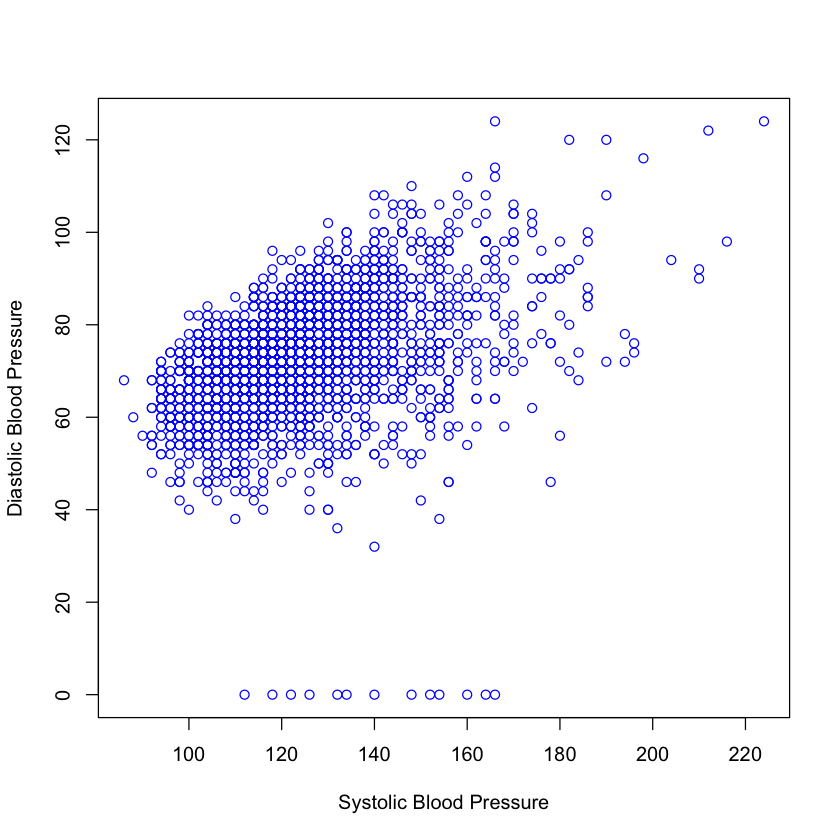

In [21]:
plot(nhanes_df$SBP1, nhanes_df$DBP1, col="blue", xlab="Systolic Blood Pressure",
    ylab="Diastolic Blood Pressure")

The two measures of blood pressure look highly correlated. We can calculate their Pearson and Spearman correlation using the `cor()` function. The default method is the Pearson correlation, but we can also calculate the Kendall or Spearman correlation by specifying the method. 

In [22]:
cor(nhanes_df$SBP1, nhanes_df$DBP1)
cor(nhanes_df$SBP1, nhanes_df$DBP1, method="spearman")

[1] 0.4166796

[1] 0.4711908

We may also want to add some extra information to our plot above. This time, instead of specifying the color manually, we use the column `hyp`, an indicator for hypertension, to specify the color. We have to make sure this vector is a factor for R to color by group. Additionally, we add a blue vertical and horizontal line using the `abline()` function to mark cutoffs for hypertension. Even though this function is called after `plot()`, the lines are automatically added to the current plot.

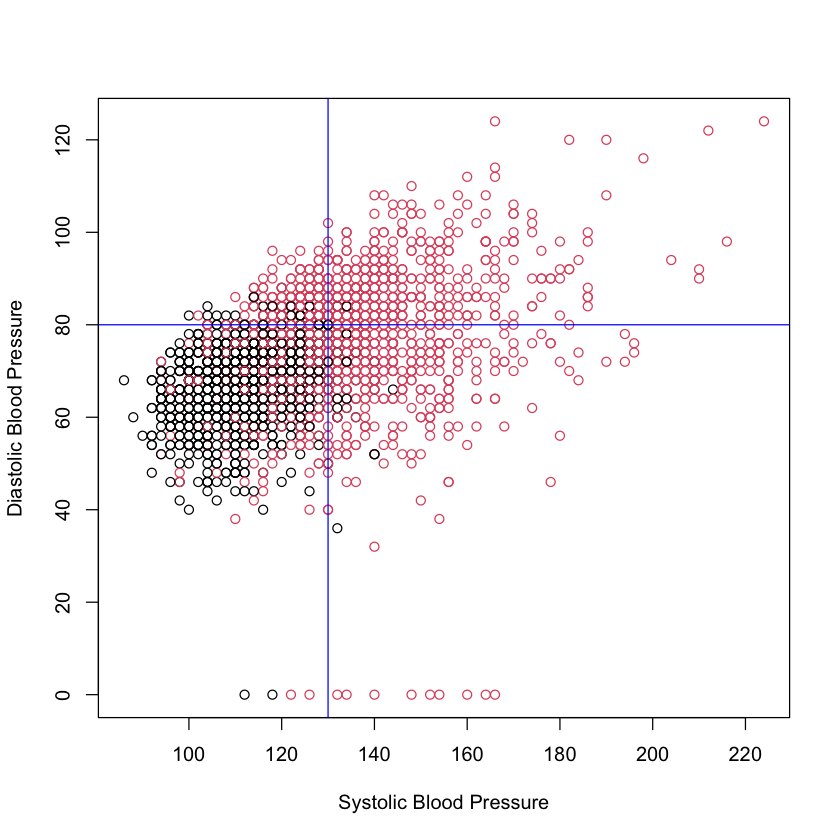

In [23]:
plot(nhanes_df$SBP1, nhanes_df$DBP1, col=as.factor(nhanes_df$HYP), 
     xlab="Systolic Blood Pressure",
     ylab="Diastolic Blood Pressure")
abline(v=130, col="blue")
abline(h=80, col="blue")

The plots above are all displayed as a single figure. If we want to display multiple plots next to each other, we can specify the graphical parameters using the `par()` function by updating the argument `mfrow=c(nrow, ncol)` with the number of columns and rows we would like to use for our figures. Below, we use this to display the distribution of log blood lead level between those with and without hypertension next to the plot from above. 

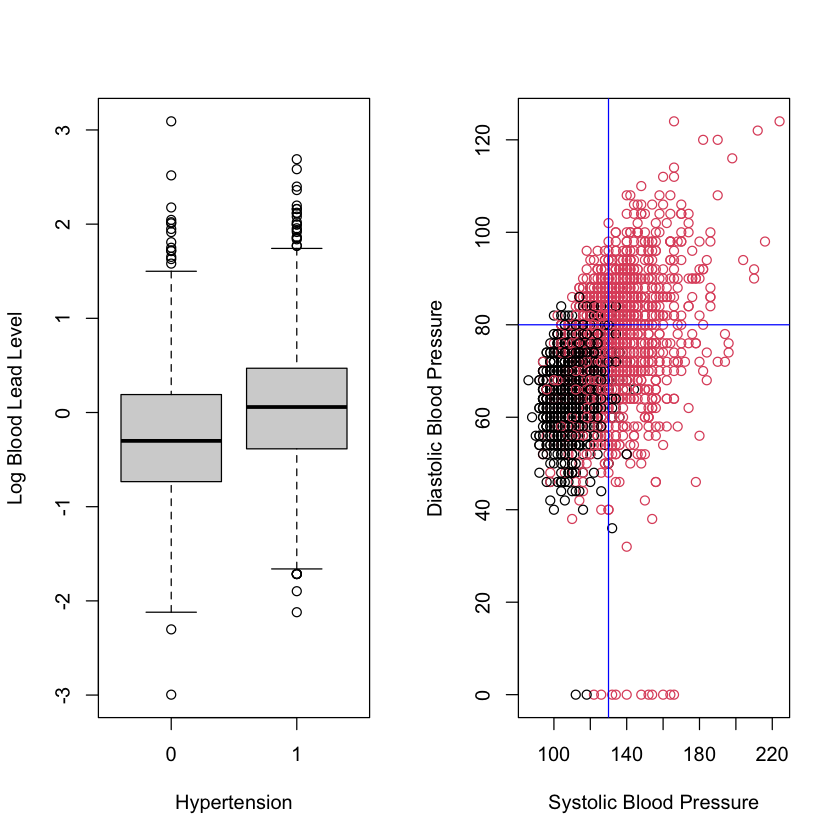

In [24]:
par(mfrow=c(1,2))

# boxplot
boxplot(log(LEAD)~HYP, data=nhanes_df, xlab="Hypertension", ylab="Log Blood Lead Level")

# scatterplot
plot(nhanes_df$SBP1, nhanes_df$DBP1, col=as.factor(nhanes_df$HYP), 
     xlab="Systolic Blood Pressure",
     ylab="Diastolic Blood Pressure")
abline(v=130, col="blue")
abline(h=80, col="blue")

We then reset to only display a single plot for future images using the `par()` function again.

In [25]:
par(mfrow=c(1,1))

### Practice Question

Recreate these three boxplots (one for each education level) of income by BMI category and arrange them next to each other using the par() function.

<img src="images/4-practicequestion2answer.png" alt= “” width="400pt" align="center">

# Create summary tables 

## Tables

Another useful way to display information about your data is through tables. For example, it is standard practice in articles to have the first table in the paper give information about the study sample, such as the mean and standard deviation for all continuous variables and the proportions for categorical variables. The `gt` package is designed to create polished tables that can include footnotes, titles, column labels, etc. The `gtsummary` package is an extension of this package that can create summary tables. We will focus on the latter but come back to creating nice tables in [Chapter 12](https://alicepaul.github.io/r-for-health-data-science/book/12_rmarkdown_reports.html).

To start, we create a gt object (a special type of table) of the first six rows of our data using the `gt()` function. In R Markdown, the table would be displayed nicely. Since we are using this within a Jupyter notebook, however, we need to pass this to another function to make sure it displays correctly as HTML. The pipe operator `%>%` passes the result on the left hand side as the first argument to the function on the right hand side. You can see the difference in the formatting as opposed to printing the data.

In [26]:
gt(head(nhanes_df)) %>% gt:::as.tags.gt_tbl()

ID,AGE,SEX,RACE,EDUCATION,INCOME,SMOKE,YEAR,LEAD,BMI_CAT,LEAD_QUANTILE,HYP,ALC,DBP1,SBP1,EVER_SMOKE
93711,56,Male,Other Race,MoreThanHS,5.00,NeverSmoke,2017,2.15,BMI<=25,Q3,0,Yes,68,108,No
93713,67,Male,Non-Hispanic White,HS,2.65,StillSmoke,2017,3.71,BMI<=25,Q4,0,Yes,70,104,Yes
93716,61,Male,Other Race,MoreThanHS,5.00,QuitSmoke,2017,1.99,BMI>=30,Q3,0,Yes,72,120,Yes
93717,22,Male,Non-Hispanic White,HS,1.49,StillSmoke,2017,1.93,BMI<=25,Q3,0,Yes,62,116,Yes
93721,60,Female,Mexican American,LessThanHS,3.04,NeverSmoke,2017,0.75,BMI>=30,Q1,1,Yes,68,132,No
93722,60,Female,Non-Hispanic White,MoreThanHS,2.07,NeverSmoke,2017,0.98,BMI<=25,Q2,0,Yes,68,116,No


We will now show you how to use the `tbl_summary()` function in the `gtsummary` package. The first argument to this function is again the data frame. By default, this function will summarize all the variables in the data. Instead, we use the `include` argument to specify a list of variables to include. We then pipe this result to `as_gt()` which creates a gt table from the summary output before passing this output to the last function again to display the HTML table. Note that the table computes the total number of observations and the proportions for categorical variables and the median and interquartile range for continuous variables.

In [27]:
tbl_summary(nhanes_df, include= c("SEX", "RACE", "AGE", "EDUCATION", "SMOKE",
                                  "BMI_CAT", "LEAD", "SBP1", "DBP1", "HYP")) %>% 
  as_gt() %>% 
  gt:::as.tags.gt_tbl()

Shiny tags cannot be represented in plain text (need html)

We can update our table by changing some of its arguments. This time, we specify that we want to stratify our table by hypertension status so that the table summarizes the data by this grouping. Additionally, we change how continuous variables are summarized by specifying that we want to report the mean and standard deviation instead of the median and interquartile range. We do this using the `statistic` argument. The documentation for the `tbl_summary()` function can help you format this argument depending on which statistics you would like to display.

In [28]:
tbl_summary(nhanes_df, include= c("SEX", "RACE", "AGE", "EDUCATION", "SMOKE",
                                  "BMI_CAT", "LEAD", "SBP1", "DBP1", "HYP"),
           by = "HYP", statistic = list(all_continuous() ~ "{mean} ({sd})")) %>% 
  as_gt() %>% 
  gt:::as.tags.gt_tbl()

Shiny tags cannot be represented in plain text (need html)

# Subset data (ask to read other slice functions) and complete practice questions

## Subsetting Data using `select`, `filter`, and `slice`

In earlier chapters, we have seen how to select and filter data using row and column indices as well as using the `subset()` function. The `dplyr` package has its own functions that are useful to subset the data. The `select()` function allows us to select a subset of columns: this function takes in the data frame (or tibble) and the names or indices of the columns we want to select. For example, if we only wanted to select the variables for race and blood lead level, we could specify these two columns. To display the result of this selection, we use the pipe operator `%>%`. Recall that this takes the result on the left hand side and passes it as the first argument to the function on the right hand side. The output below shows that there are only two columns in the filtered data.  

In [29]:
select(nhanes_df, c(RACE, LEAD)) %>% head()

,RACE,LEAD
,<fct>,<dbl>
27663,Other Race,2.15
27664,Non-Hispanic White,3.71
27667,Other Race,1.99
27668,Non-Hispanic White,1.93
27670,Mexican American,0.75
27671,Non-Hispanic White,0.98


The `select()` function can also be used to *remove* columns by adding a negative sign in front of the vector of column names in its arguments. For example, below we keep all columns except `ID` and `LEAD_QUANTILE`. Note that in this case we have saved the selected data back to our data frame `nhanes_df`. Additionally, this time we used a pipe operator to pipe the data to the select function itself.

In [30]:
nhanes_df <- nhanes_df %>% select(-c(ID, LEAD_QUANTILE))
names(nhanes_df)

[1] "AGE"        "SEX"        "RACE"       "EDUCATION"  "INCOME"    
 [6] "SMOKE"      "YEAR"       "LEAD"       "BMI_CAT"    "HYP"       
[11] "ALC"        "DBP1"       "SBP1"       "EVER_SMOKE"

While `select()` allows us to choose a subset of columns, the `filter()` function allows us to choose a subset of rows.  The `filter()` function takes a data frame as the first argument and a vector of booleans as the second argument. This vector of booleans can be generated using conditional statements as we used in [Chapter 4](https://alicepaul.github.io/r-for-health-data-science/book/4_exploratory_analysis.html). Below, we choose to filter the data to only observations after 2008.

In [31]:
nhanes_df_recent <- nhanes_df %>% filter(YEAR >= 2008)

We can combine conditions by using multiple `filter` calls, by creating a more complicated conditional statement using the `&` (and), `|` (or), and `%in%` (in) operators, or by separating the conditions with commas within filter. Below, we demonstrate these three ways to filter the data to males between 2008 and 2012. Note that the `between()` function allows us to capture the logic `YEAR >= 2008 & YEAR <= 2012`. 

In [32]:
# Example 1: multiple filter calls
nhanes_df_males1 <- nhanes_df %>%
  filter(YEAR <= 2012) %>%
  filter(YEAR >= 2008) %>%
  filter(SEX == "Male")

# Example 2: combine with & operator
nhanes_df_males2 <- nhanes_df %>%
  filter((YEAR <= 2012) & (YEAR >= 2008) & (SEX == "Male"))

# Example 3: combine into one filter call with commas
nhanes_df_males3 <- nhanes_df %>%
  filter(between(YEAR, 2008, 2012), SEX == "Male")

The use of parentheses in the code above is especially important in order to capture our desired logic. In all these examples, we broke our code up into multiple lines, which makes it easier to read. A good rule of thumb is to not go past 80 characters in a line, and R Studio conveniently has a vertical gray line at this limit. To create a new line, you can hit enter either after an operator (e.g. `%>%`, `+`, `|`) or within a set of unfinished brackets or parentheses. Either of these breaks lets R know that your code is not finished yet. 

Lastly, we can subset the data using the `slice()` function to select a slice of rows by their index. The function takes in the data set and a vector of indices. Below, we find the first and last rows of the data. 

In [33]:
slice(nhanes_df, c(1, nrow(nhanes_df)))

AGE,SEX,RACE,EDUCATION,INCOME,SMOKE,YEAR,LEAD,BMI_CAT,HYP,ALC,DBP1,SBP1,EVER_SMOKE
<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
56,Male,Other Race,MoreThanHS,5.00,NeverSmoke,2017,2.15,BMI<=25,0,Yes,68,108,No
38,Male,Non-Hispanic White,MoreThanHS,1.56,StillSmoke,2017,0.90,BMI>=30,1,Yes,98,150,Yes


A few other useful slice functions are `slice_sample()`, `slice_max()`, and `slice_min()`. The first takes in an argument `n` which specifies the number of *random* rows to sample from the data. For example, we could randomly sample 100 rows from our data. The latter two allow us to specify a column through the argument `order_by` and return the `n` rows with either the highest or lowest values in that column. Below we find the three male observations from 2007 with the highest and lowest blood lead levels and select a subset of columns to display.

In [34]:
# three male observations with highest blood lead level in 2007
nhanes_df %>%
  filter(YEAR == 2007, SEX == "Male") %>%
  select(c(RACE, EDUCATION, SMOKE, LEAD, SBP1, DBP1)) %>%
  slice_max(order_by = LEAD, n=3)

# three male observations with lowest blood lead level in 2007
nhanes_df %>%
  filter(YEAR == 2007, SEX == "Male") %>%
  select(c(RACE, EDUCATION, SMOKE, LEAD, SBP1, DBP1)) %>%
  slice_min(order_by = LEAD, n=3)

RACE,EDUCATION,SMOKE,LEAD,SBP1,DBP1
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>


RACE,EDUCATION,SMOKE,LEAD,SBP1,DBP1
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>


### Practice Question

Filter the data to only those with an education level of more than HS who report alcohol use, select the diastolic blood pressure variables, and display the 4th and 10th rows. This is what they should look like:

<img src="images/5-practicequestion1answer.png" alt= “” width="200pt" align="center">

# Transform rows and columns and complete practice questions

## Updating Rows and Columns using `rename`, `mutate`, and `arrange`

The next few functions we will look at will allow us to update the rows and columns in our data. For example, the `rename()` function allows us to change the names of columns. Below, we change the name of `INCOME` to `PIR` since this variable is the poverty income ratio and also update the name of `SMOKE` to be `SMOKE_STATUS`. When specifying these names, the new name is on the left of the `=` and the old name is on the right.

In [35]:
nhanes_df <- nhanes_df %>% rename(PIR = INCOME, SMOKE_STATUS = SMOKE)
names(nhanes_df)

[1] "AGE"          "SEX"          "RACE"         "EDUCATION"    "PIR"         
 [6] "SMOKE_STATUS" "YEAR"         "LEAD"         "BMI_CAT"      "HYP"         
[11] "ALC"          "DBP1"         "SBP1"         "EVER_SMOKE"

In the last chapter, we created a new variable called `EVER_SMOKE` based on the smoking status variable using the `ifelse()` function. Recall that this function allows us to specify a condition and then two alternative values based on whether we meet or do not meet this condition. We see that there are about 15,000 subjects in our data who never smoked. 

In [36]:
ifelse(nhanes_df$SMOKE_STATUS == "NeverSmoke", "No", "Yes") %>% table()

.
  No  Yes 
1411 1173 

Another useful function from the tidyverse is the `case_when()` function, which is an extension of the `ifelse()` function but allows to specify more than two cases. We demonstrate this function below to show how we could relabel the levels of the `SMOKE_STATUS` column. For each condition, we use the right side of the `~` to specify the value associated with a TRUE for that condition. 

In [37]:
case_when(nhanes_df$SMOKE_STATUS == "NeverSmoke" ~ "Never Smoked",
          nhanes_df$SMOKE_STATUS == "QuitSmoke" ~ "Quit Smoking",
          nhanes_df$SMOKE_STATUS == "StillSmoke" ~ "Current Smoker") %>% table()

.
Current Smoker   Never Smoked   Quit Smoking 
           542           1411            631 

Above, we did not store the columns we created. To do so, we could use the `$` operator or the  `cbind()` function. The tidyverse also includes an alternative function to add columns called `mutate()`. This function takes in a data frame and a set of columns with associated names to add to the data or update. In the example below, we create the column `EVER_SMOKE` and update the column `SMOKE_STATUS`. Within the `mutate()` function, we do not have to use the `$` operator to reference the column `SMOKE_STATUS`. Instead, we can specify just the column name and it will interpret it as that column.

In [38]:
nhanes_df <- nhanes_df %>% 
  mutate(EVER_SMOKE = ifelse(SMOKE_STATUS == "NeverSmoke", "No", "Yes"), 
         SMOKE_STATUS = case_when(SMOKE_STATUS == "NeverSmoke" ~ "Never Smoked",
                                  SMOKE_STATUS == "QuitSmoke" ~ "Quit Smoking",
                                  SMOKE_STATUS == "StillSmoke" ~ "Current Smoker")) 

The last function we will demonstrate in this section is the `arrange()` function, which takes in a data frame and a vector of columns used to sort the data (data is sorted by the first column with ties being sorted by the second column, etc.). By default, the `arrange()` function sorts the data in increasing order, but we can use the `desc()` function to instead sort in descending order. For example, the code below filters the data to male smokers before sorting by decreasing systolic and diastolic blood pressure in descending order. 

In [39]:
nhanes_df %>% 
  select(c(YEAR, SEX, SMOKE_STATUS, SBP1, DBP1, LEAD)) %>%
  filter(SEX == "Male", SMOKE_STATUS == "Current Smoker") %>%
  arrange(desc(SBP1), desc(DBP1)) %>%
  head(10)

,YEAR,SEX,SMOKE_STATUS,SBP1,DBP1,LEAD
,<dbl>,<fct>,<chr>,<dbl>,<dbl>,<dbl>
1,2017,Male,Current Smoker,212,122,2.20
2,2017,Male,Current Smoker,198,116,4.83
3,2017,Male,Current Smoker,186,88,1.67
4,2017,Male,Current Smoker,184,74,2.06
5,2017,Male,Current Smoker,182,92,3.19
6,2017,Male,Current Smoker,176,90,3.37
7,2017,Male,Current Smoker,174,102,1.23
8,2017,Male,Current Smoker,174,76,2.01
9,2017,Male,Current Smoker,170,98,0.95


### Practice Question

Create a new column called `DBP_CHANGE` that is equal to the difference between a patient's first and fourth diastolic blood pressure readings. Then, sort the dataframe by this new column in increasing order. The first four `DBP_CHANGE` values in the head of the resulting dataset should be -66, -64, -64, and -62.

# Summarize functions to compute multiple statistics 

## Summarizing using `summarize` and `group_by`

If we wanted to understand how many observations there are for each given race category, we could use the `table()` function as we described in earlier chapters. Another similar function is the `count()` function. This function takes in a data frame and one or more columns and counts the number of rows for each combination of unique values in these columns. If no columns are specified, it counts the total number of rows in the data frame. Below, we find the total number of rows (31,265) and the number of observations by race and year. We can see that the number in each group fluctuates quite a bit!

In [40]:
count(nhanes_df)
count(nhanes_df, RACE, YEAR)

n
<int>
2584


RACE,YEAR,n
<fct>,<dbl>,<int>
Mexican American,2017,358
Other Hispanic,2017,225
Non-Hispanic White,2017,992
Non-Hispanic Black,2017,568
Other Race,2017,441


Finding the counts like we did above is a form of a summary statistic for our data. The `summarize()` function in the tidyverse is used to compute summary statistics of the data and allows us to compute multiple statistics: this function takes in a data frame and one or more summary functions based on the given column names. In the example below, we find the total number of observations as well as the mean and median systolic blood pressure for Non-Hispanic Blacks. Note that the `n()` function is the function within `summarize()` that finds the number of observations. In the `mean()` and `median()` functions we set `na.rm=TRUE` to remove NAs before computing these values (otherwise we could get NA as our output).

In [41]:
nhanes_df %>%
  filter(RACE == "Non-Hispanic Black") %>%
  summarize(TOT = n(), MEAN_SBP = mean(SBP1, na.rm=TRUE), MEAN_DBP = mean(DBP1, na.rm=TRUE))

TOT,MEAN_SBP,MEAN_DBP
<int>,<dbl>,<dbl>
568,129.3451,74.27817


If we wanted to repeat this for the other race groups, we would have to change the arguments to the `filter()` function each time. To avoid having to repeat our code and/or do this multiple times, we can use the `group_by()` function, which takes a data frame and one or more columns with which to group the data by. Below, we group using the `RACE` variable. When we look at printed output it looks almost the same as it did before except we can see that its class is now a grouped data frame, which is printed at the top. In fact, a grouped data frame (or grouped tibble) acts like a set of data frames: one for each group. If we use the `slice()` function with index 1, it will return the first row for each group.

In [42]:
nhanes_df %>% 
  group_by(RACE) %>%
  slice(1)

AGE,SEX,RACE,EDUCATION,PIR,SMOKE_STATUS,YEAR,LEAD,BMI_CAT,HYP,ALC,DBP1,SBP1,EVER_SMOKE
<dbl>,<fct>,<fct>,<fct>,<dbl>,<chr>,<dbl>,<dbl>,<fct>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
60,Female,Mexican American,LessThanHS,3.04,Never Smoked,2017,0.75,BMI>=30,1,Yes,68,132,No
26,Male,Other Hispanic,MoreThanHS,5.00,Quit Smoking,2017,0.93,BMI>=30,1,Yes,82,120,Yes
67,Male,Non-Hispanic White,HS,2.65,Current Smoker,2017,3.71,BMI<=25,0,Yes,70,104,Yes
53,Male,Non-Hispanic Black,MoreThanHS,5.00,Never Smoked,2017,1.32,BMI>=30,1,Yes,74,122,No
56,Male,Other Race,MoreThanHS,5.00,Never Smoked,2017,2.15,BMI<=25,0,Yes,68,108,No


Grouping data is very helpful in combination with the `summarize()` function. Like with the `slice()` function, `summarize()` will calculate the summary values for each group. We can now find the total number of observations as well as the mean systolic and diastolic blood pressure values for each racial group. Note that the returned summarized data is in a tibble. 

In [43]:
nhanes_df %>% 
  group_by(RACE) %>%
  summarize(TOT = n(), MEAN_SBP = mean(SBP1, na.rm=TRUE), MEAN_DBP = mean(DBP1, na.rm=TRUE))

RACE,TOT,MEAN_SBP,MEAN_DBP
<fct>,<int>,<dbl>,<dbl>
Mexican American,358,123.5196,72.73743
Other Hispanic,225,123.8578,73.01333
Non-Hispanic White,992,123.7722,71.19355
Non-Hispanic Black,568,129.3451,74.27817
Other Race,441,121.6916,74.41270


After summarizing, the data is no longer grouped by race. If we ever want to remove the group structure from our data, we can use the `ungroup()` function, which restores the data to a single data frame. After ungrouping by race below, we can see that we get a single observation returned by the `slice()` function.

In [44]:
nhanes_df %>% 
  select(SEX, RACE, SBP1, DBP1) %>%
  group_by(RACE) %>%
  ungroup() %>%
  arrange(desc(SBP1)) %>%
  slice(1)

SEX,RACE,SBP1,DBP1
<fct>,<fct>,<dbl>,<dbl>
Female,Non-Hispanic Black,224,124


### Practice Question

Create a data frame summarizing the percent of patients with hypertension by smoking status. The result should look like this: 

<img src="images/5-practicequestion3answer.png" alt= “” width="200pt" align="center">

# Basic ggplots with one geom() argument and appropriate labels 

In [45]:
data(pain)

# sampling data
set.seed(5)
pain_df <- pain[complete.cases(subset(pain, select=-c(PAIN_INTENSITY_AVERAGE.FOLLOW_UP))), ]
pain_df <- pain_df[sample(1:nrow(pain_df), 5000, replace=FALSE),] 

## Intro to ggplot

We'll begin by demonstrating how to create a scatter plot in `ggplot2` to introduce the three key elements of a `ggplot2` object. Specifically, we will create a scatter plot of a patient's depression vs. anxiety score. To start a graph, we can use the `ggplot()` function to create a `ggplot` object as below. Note that this brings up a gray box - this will be the base that we will build up from. 

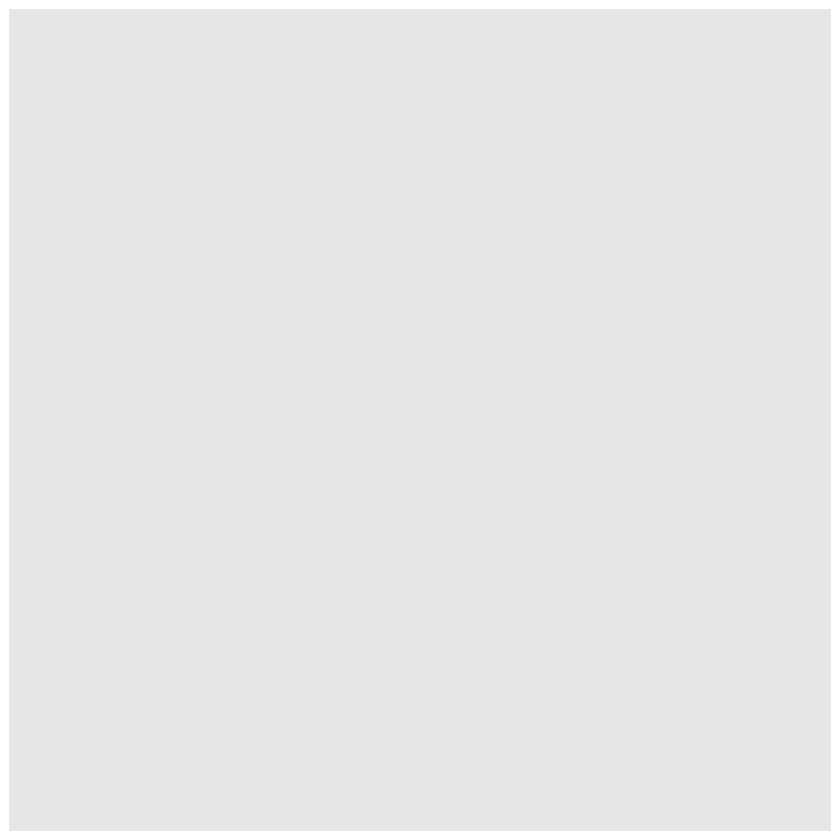

In [2]:
ggplot()

Now we can start adding layers to our `ggplot` object. One type of layer is a **geom**, which creates a geometric object. Below, we use the `geom_point()` function to add a scatter plot layer. For this function, we first need to specify which data we want to use, and then we need to tell R how to use that data to create the scatter plot using the `aes()` function, which creates an **aesthetic**. For a scatter plot, we need to at least specify the x-axis and y-axis in the aesthetic. Both the data and the aesthetic can either be specified in our initial `ggplot()` function, which will pass this information to all future layers, or in the `geom_point()` function itself. Below, we specify the aesthetic in the geom function but also include two alternative ways to code the same image that are commented out. The resulting plot shows a fairly linear relationship between anxiety and depression.

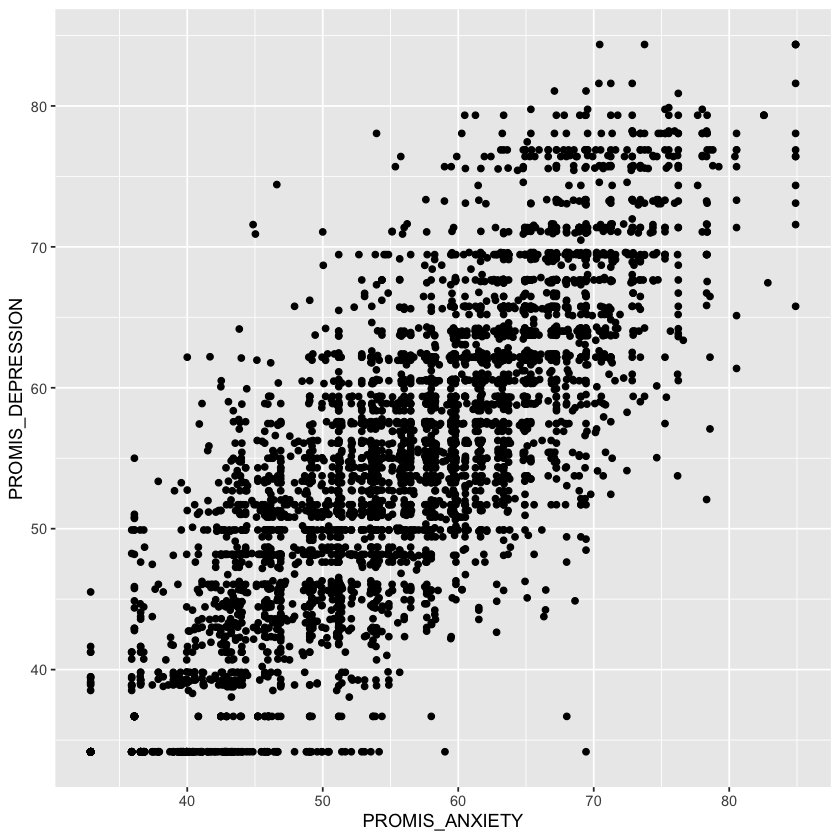

In [3]:
ggplot(pain_df) + geom_point(aes(x=PROMIS_ANXIETY, y = PROMIS_DEPRESSION))
# ggplot(pain_df, aes(x=PROMIS_ANXIETY, y = PROMIS_DEPRESSION)) + geom_point()
# ggplot() + geom_point(data = pain_df, aes(x=PROMIS_ANXIETY, y = PROMIS_DEPRESSION))

If we want to improve our plot, we may want to add different labels and a title. To do so, we use the `labs()` function to add a layer in which we can specify all labels. Additionally, I have passed more information to the geometry layer by changing the color, size, and shape of the points. These things are specified outside of the `aes()` function since they do not come from the data - every point has the same color, size, and shape in this example. 

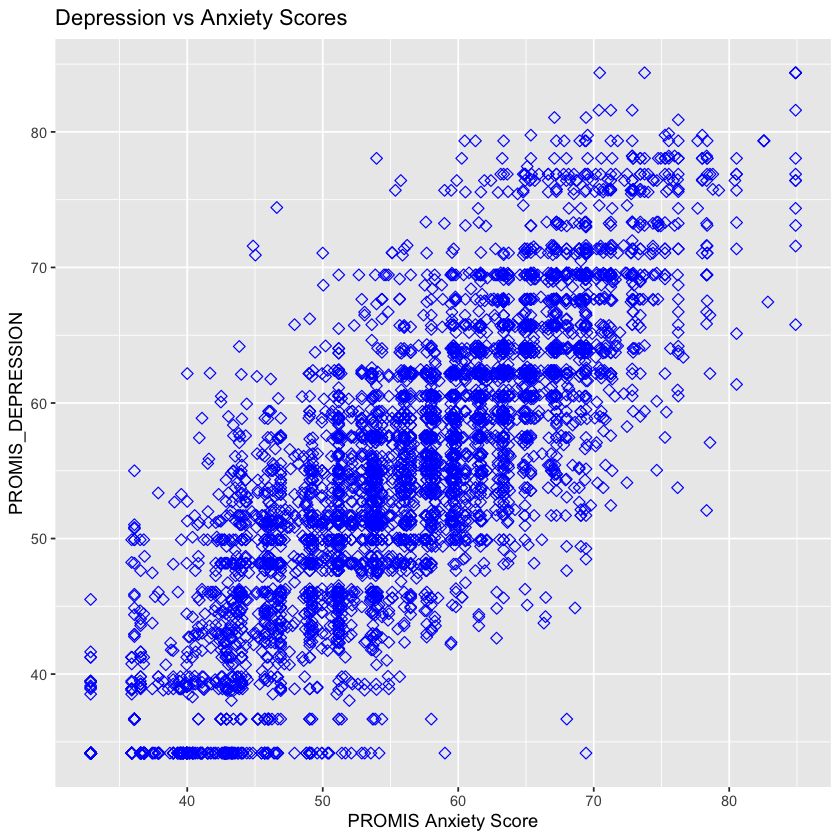

In [4]:
ggplot(pain_df)+
  geom_point(aes(x=PROMIS_ANXIETY, y = PROMIS_DEPRESSION), color="blue", size=2, shape = 5) + 
  labs(x="PROMIS Anxiety Score", ylab="PROMIS Depression Score", title = "Depression vs Anxiety Scores")

Let's create another example. This time, I will create a histogram for initial recorded pain level. To find the corresponding geom for the type of plot we'd like to make, we can use the [data visualization cheat sheet from Posit]( https://posit.co/wp-content/uploads/2022/10/data-visualization-1.pdf). The first page lists all the geom options available along with what aesthetics we can set for each option. For example, here we are interested in plotting the distribution of one continuous variable, and under the `geom_histogram()` function we can see that we can specify `x` (the variable whose distribution we want to plot) as well as `binwidth`, `y`, `alpha`, `color`, `fill`, `linetype`, `size`, and `weight`. By default, the `y` value in a histogram is the count for each bin.

In the code below, you can see that we updated the color (`color`), fill (`fill`), and opacity (`alpha`) of our histogram bars and updated the number of bins to be 11 (to account for the possible values 0-10). Additionally, we used the `theme_minimal()` function to change the background colors used. You can find the available themes on the second page of the cheat sheet. Try changing the theme of the above plot to `theme_bw()`. 

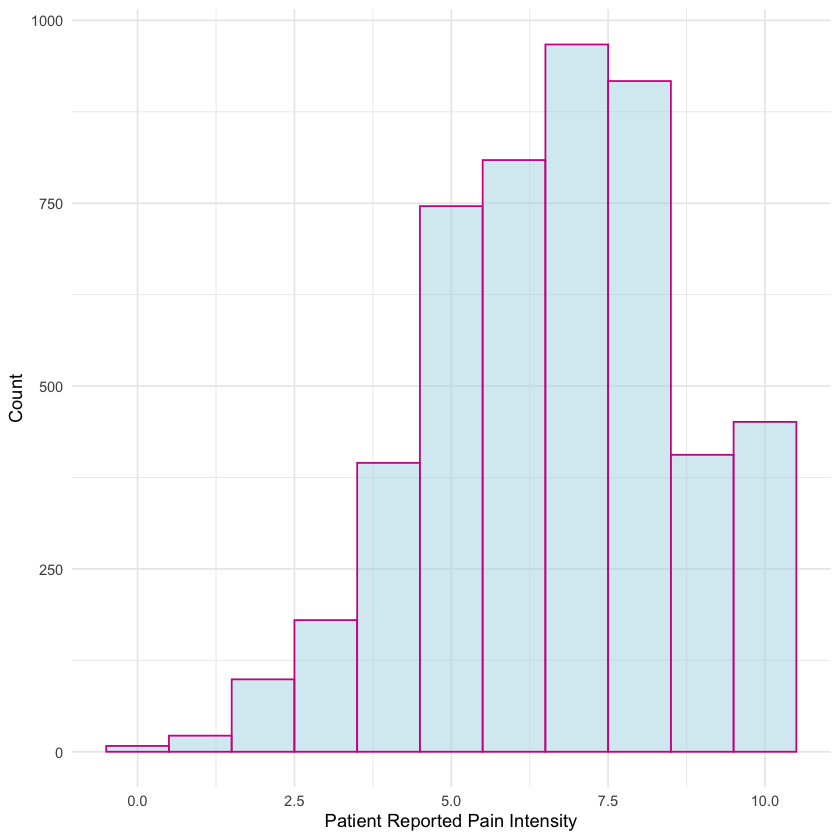

In [5]:
ggplot(pain_df)+
  geom_histogram(aes(x=PAIN_INTENSITY_AVERAGE), color="violetred", fill="lightblue", alpha=0.5, bins = 11) +
  labs(x="Patient Reported Pain Intensity", y="Count")+
  theme_minimal()

# Scale functions to specify the color gradient, x-axis and y-axis labels

## Adjusting the Axes and Aesthetics

We can further control how each part specified in the aesthetic is displayed using **scale** functions. For example, suppose that I wanted to update the plot above. In particular, I first want to update the x-axis to display all of the values 0 to 10 instead of 0, 2.5, 5, etc.. To update the x-axis, I need to find the corresponding scale function for x with continuous values. This function is `scale_x_continuous()`, which allows me to specify limits (`limits`), breaks (`breaks`), and labels (`labels`). The scale functions can be found on the second sheet of the cheat sheet. In this case, I just want to update the breaks to be all integer values from 0 to 10. 

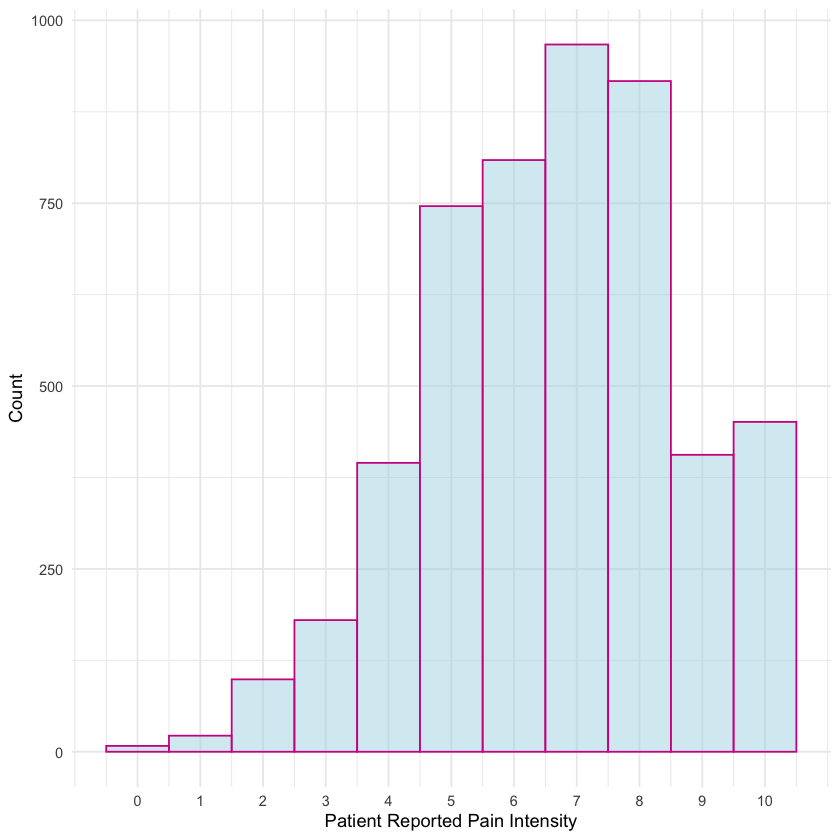

In [7]:
ggplot(pain_df)+
  geom_histogram(aes(x=PAIN_INTENSITY_AVERAGE), color="violetred", fill="lightblue", alpha=0.5, bins = 11) +
  labs(x="Patient Reported Pain Intensity", y="Count")+
  scale_x_continuous(breaks=0:10)+
  theme_minimal()

Now, let's take a more complex example. The plot below shows each patient's reported sleep disturbance vs. physical function and colors each point by their reported pain intensity. Since some points might overlap in values, we added `position="jitter"` to the `geom_point()` function to jitter the points. As it stands, this plot is difficult to read. For example, the color of pain intensity makes it hard to see how pain changes, and the legend title needs to be simpler.  

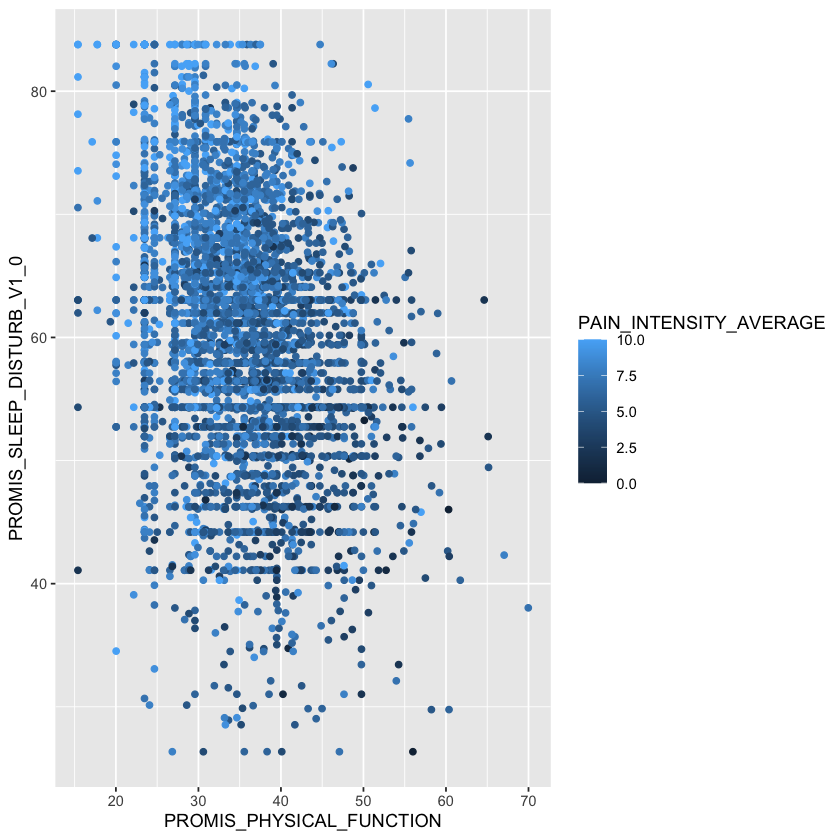

In [8]:
ggplot(pain_df)+
  geom_point(aes(x=PROMIS_PHYSICAL_FUNCTION, y=PROMIS_SLEEP_DISTURB_V1_0, color=PAIN_INTENSITY_AVERAGE), 
             position="jitter")

Suppose that we wanted to visualize the pain intensity and sleep disturbance for patients with below-average physical function. Note that both sleep disturbance and physical function are reported as T-Scores, meaning that the raw scores have been converted to a standardized score with mean 50 and standard deviation 10 within the population. We can use the scale functions to update our axes and labels to reflect this information. As before, we need to use the `scale_x_continuous()` function to update the x-axis for a continuous variable. In this case, we update the limits (to restrict to below average physical function), breaks, and labels. We similarly update the y-axis. 

Lastly, suppose we want to update the color aesthetic. As before, this aesthetic corresponds to a continuous variable. The cheat sheet provides several possible scale functions depending on how we want to specify the color gradient. We choose the `scale_color_gradient()` function, since this allows us to specify the low and high end colors. We can also specify the breaks for the legend values similar to how we specified the breaks for the x and y axes. The argument `name` also allows us to rename this legend. The palette then converts this to a continuous color gradient. Note that in contrast to the `scale_color_gradient()` function that we chose to use for this example, the functions `scale_color_gradient2()` and `scale_color_gradientn()` allow you to specify more color points in the gradient rather than just the two extreme colors. 

Note that this time we receive a warning message, which is because our axis limits have cut off some points. To avoid this message, we could use the function `coord_cartesian()` to specify our limits which clips the values rather than removing points outside the limits. 

Warning message:
“Removed 121 rows containing missing values (`geom_point()`).”


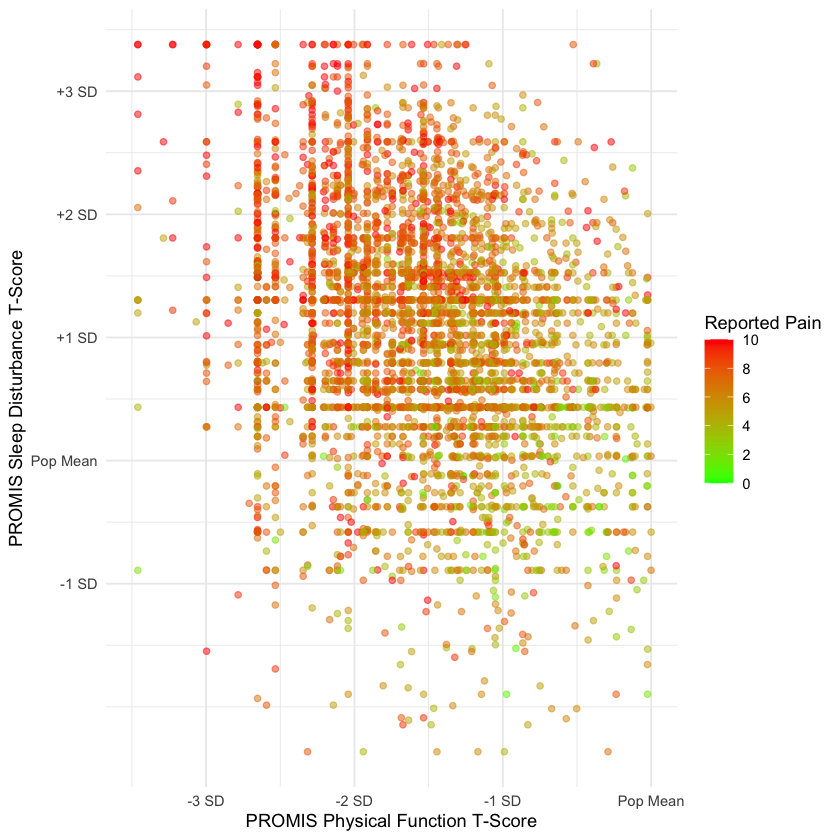

In [9]:
ggplot(pain_df)+
  geom_point(aes(x=PROMIS_PHYSICAL_FUNCTION, y=PROMIS_SLEEP_DISTURB_V1_0, color=PAIN_INTENSITY_AVERAGE), 
             position="jitter", alpha=0.5) +
  scale_x_continuous(limits=c(15,50), breaks = c(20, 30, 40, 50), labels = c("-3 SD", "-2 SD", "-1 SD", "Pop Mean")) + 
  scale_y_continuous(breaks = c(40, 50, 60, 70, 80), labels = c("-1 SD", "Pop Mean", "+1 SD", "+2 SD", "+3 SD")) +
  scale_color_gradient(breaks= seq(0,10,2), low="green", high="red", "Reported Pain") +
  labs(x="PROMIS Physical Function T-Score", y = "PROMIS Sleep Disturbance T-Score") + 
  theme_minimal()

We now demonstrate these scale functions for discrete variables. In the example below, we first create a new race variable that has only three categories since other groups have limited observations. We then create a box plot for pain intensity by race. There are two discrete aesthetics here: color and the y-axis. 

In [10]:
pain_df$PAT_RACE_CAT <- as.factor(ifelse(pain_df$PAT_RACE %in% c("BLACK", "WHITE"), pain_df$PAT_RACE, "OTHER"))

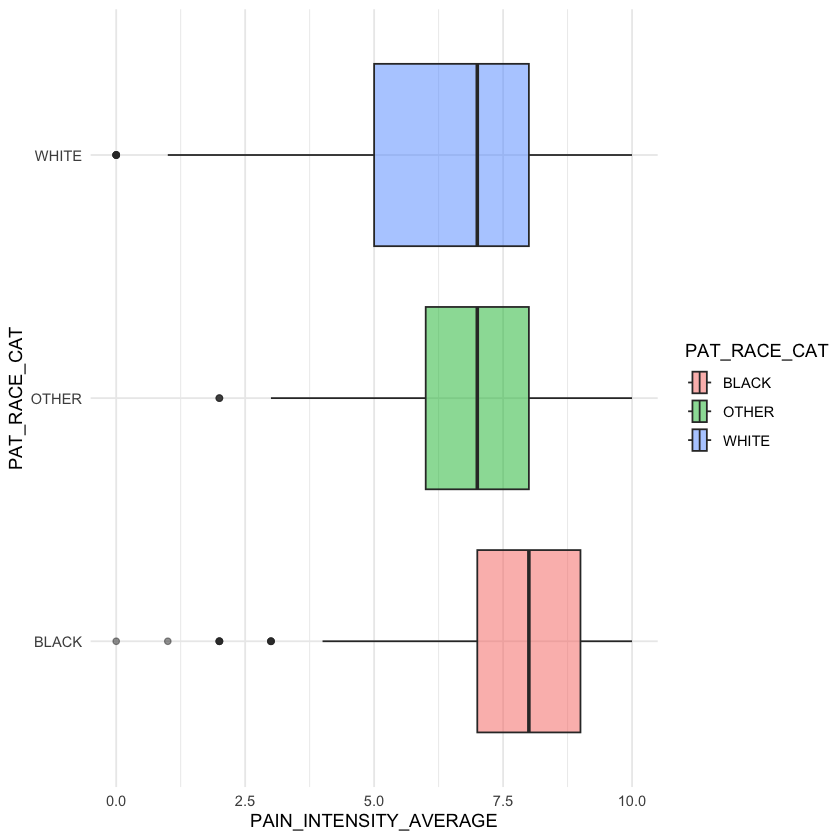

In [11]:
ggplot(pain_df)+
  geom_boxplot(aes(y=PAT_RACE_CAT, x=PAIN_INTENSITY_AVERAGE, fill=PAT_RACE_CAT), alpha=0.5) +
  theme_minimal()

 The function `scale_y_discrete()` is the scale function that corresponds to a discrete y-axis. In this case, we want to update the order and labels of this y-axis. To update the order, we can either refactor the variable using `factor()` prior to plotting or update the `limits` argument of the scale function. The function `scale_fill_brewer()` is a scale function to control the color palette of a discrete variable used for the fill aesthetic. We use this function to specify the [color palette](https://r-graph-gallery.com/38-rcolorbrewers-palettes.html) (`palette`) and to specify that that we do not want a legend (`guide`). Since we do not have a legend, we do not update the values and labels in this function.

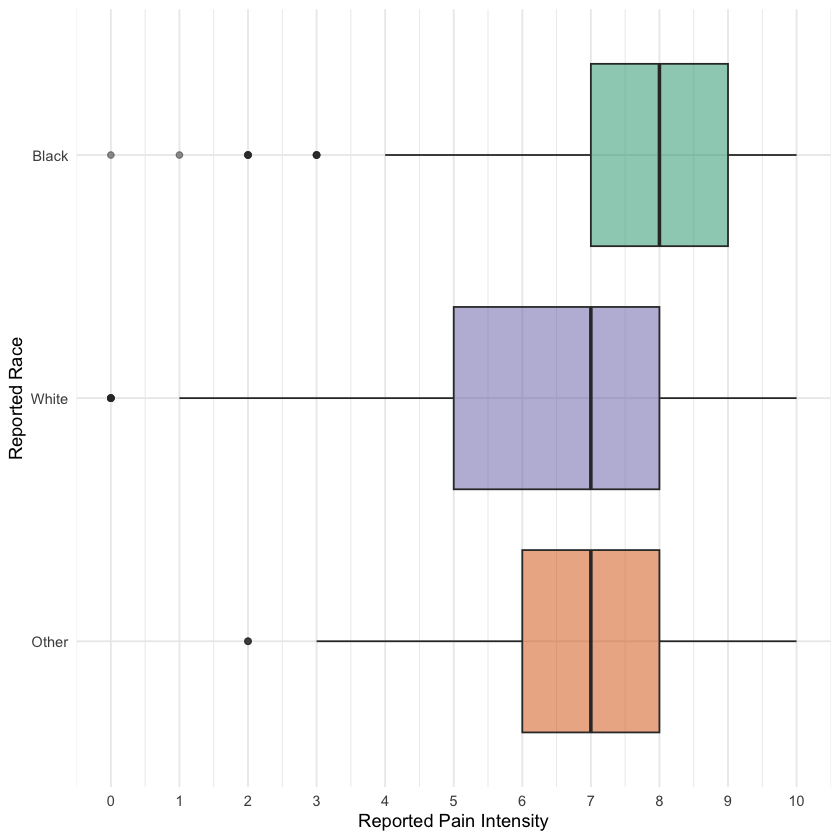

In [12]:
ggplot(pain_df)+
  geom_boxplot(aes(y=PAT_RACE_CAT, x=PAIN_INTENSITY_AVERAGE, fill=PAT_RACE_CAT), alpha=0.5) +
  scale_x_continuous(breaks=c(0:10)) +
  scale_y_discrete(limits=c("OTHER", "WHITE", "BLACK"), labels=c("Other", "White", "Black")) +
  scale_fill_brewer(palette="Dark2", guide="none") +
  labs(x="Reported Pain Intensity", y="Reported Race") +
  theme_minimal()

Here is one more example of how you can use the scale functions - take a look at the code below. We used two `geom_histogram()` calls, or layers, to plot a histogram of pain at baseline and at follow-up. We also specify the fill to be by "Baseline" and "Follow-up" within the aesthetic, even though this isn't a column in the data: this is a sort of manual way to color the bars. We use the `scale_fill_manual()` function to then specify the colors we want to use for these two categories using the `values` argument. We received three warnings when creating this function! This is because we have many NA values for follow-up and because we did not specify the bin size for either histogram. C'est la vie. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 3604 rows containing non-finite values (`stat_bin()`).”


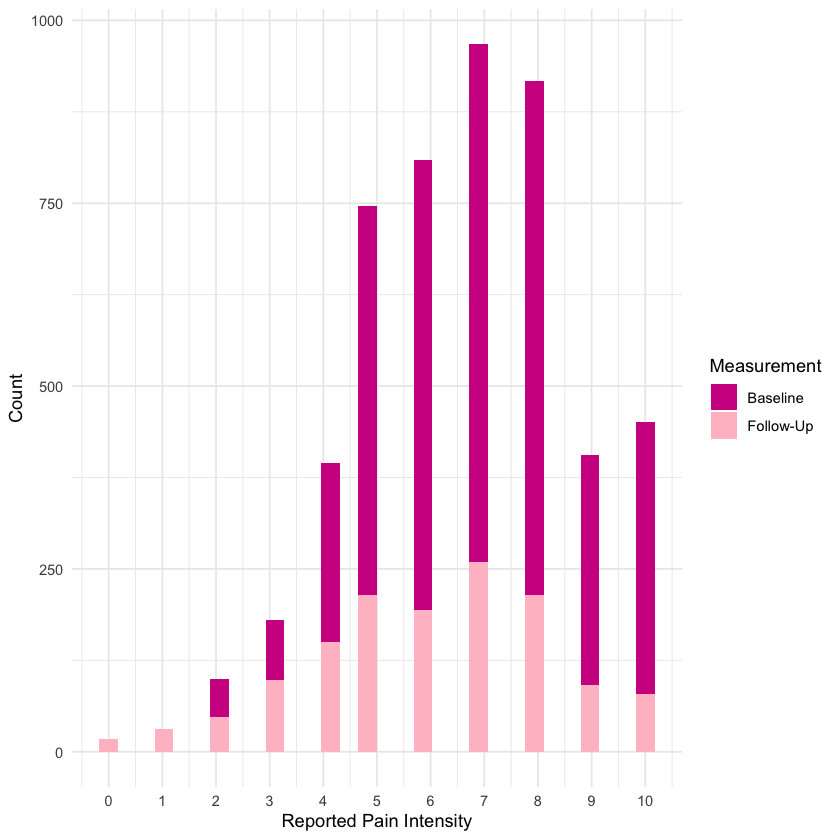

In [13]:
ggplot(pain_df)+
  geom_histogram(aes(x=PAIN_INTENSITY_AVERAGE, fill="Baseline")) +
  geom_histogram(aes(x=PAIN_INTENSITY_AVERAGE.FOLLOW_UP, fill="Follow-Up")) +
  scale_x_continuous(breaks=c(0:10)) + 
  scale_fill_manual(values=c("violetred", "pink"), name="Measurement") +
  labs(x="Reported Pain Intensity", y = "Count") +
  theme_minimal()

# Facet options

Another way to visualize data by group is to add a facet wrap to your ggplot object. Facets divide a plot into subplots based on one or more discrete variable values. We can either arrange these plots as a grid where the rows and/or columns correspond to the variables we are grouping by (using `facet_grid()`) or we can wrap the plots into a rectangular format (using `facet_wrap()`). Below, we take one of our previous plots and add a facet grid by race.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 3604 rows containing non-finite values (`stat_bin()`).”


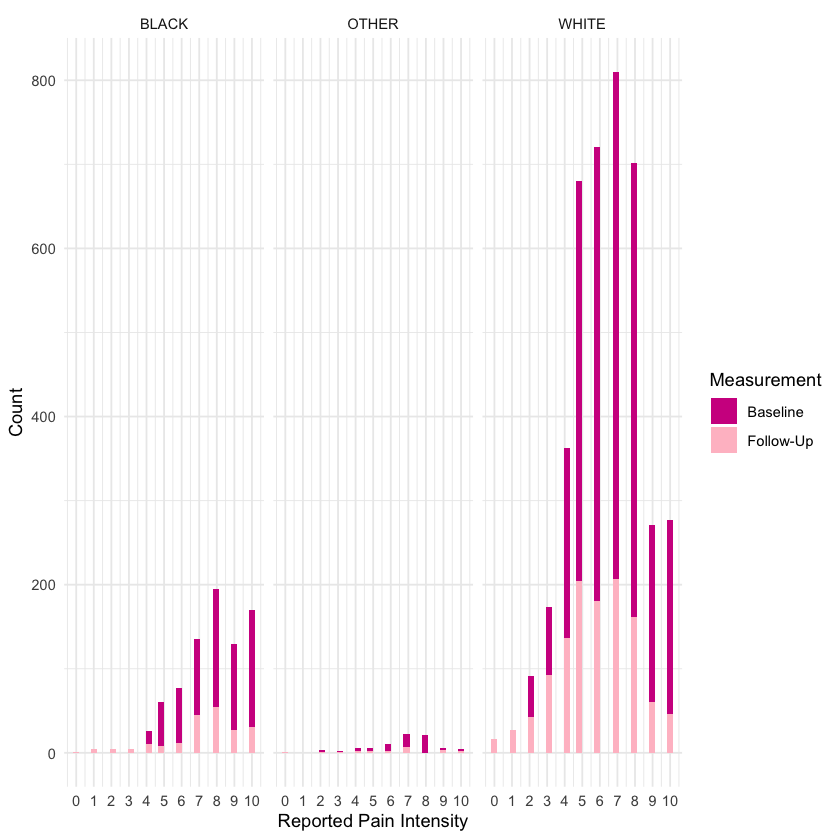

In [18]:
ggplot(pain_df)+
  geom_histogram(aes(x=PAIN_INTENSITY_AVERAGE, fill="Baseline")) +
  geom_histogram(aes(x=PAIN_INTENSITY_AVERAGE.FOLLOW_UP, fill="Follow-Up")) +
  scale_x_continuous(breaks=c(0:10)) + 
  scale_fill_manual(values=c("violetred", "pink"), name="Measurement") +
  labs(x="Reported Pain Intensity", y = "Count") +
  facet_grid(col=vars(PAT_RACE_CAT))+
  theme_minimal()